In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# Check for missing values

missing_values = data.isnull().sum()
print(missing_values)


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [7]:
# Select only numeric columns for Z-score calculation
numeric_columns = data.select_dtypes(include=[np.number])

# Handling outliers using Z-score
z_scores = np.abs((numeric_columns - numeric_columns.mean()) / numeric_columns.std())
data_cleaned = data[(z_scores < 3).all(axis=1)]

In [9]:
print(data_cleaned.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:


# Split the data into features (X) and target (y)
X = data_cleaned[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data_cleaned['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Create a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'linear_regression_model.joblib')

# Load the model
model = joblib.load('linear_regression_model.joblib')

In [12]:
# Predict the prices of houses in the test data
prices = model.predict(X_test)


In [13]:
# Evaluate the model
print("Predicted prices:", prices)

Predicted prices: [160506.12120067 164103.61100468 211889.35876396 202526.60934854
 138446.34894759 123844.77268428  84589.81041117 143894.18298806
 227763.24716574 194962.60483512 281248.15094205 109400.60427908
 188190.85932169 189829.58651087 270509.89071921 101994.00762378
  92842.87525565 194696.77859864 175001.88894034 227974.86421304
 218609.50494291 288866.36464464 166008.16443033 198983.32873371
 319496.62731315 217763.03675373 208663.50372007 102946.2843366
 139398.62566041 175742.54860587 120298.88221474 222418.61179421
 235224.05301023 138975.39156582 277756.46966169 175862.86138944
  93846.75130294 252256.61546272 132838.49719429 120724.72616404
 258021.87507413 181364.9046191  243051.27390541 266171.74124967
 174804.77615297 145481.31084277 230036.8254968  190410.22846358
 245273.252902   186866.94784875 217551.41970644 194539.37074053
 127388.0532991  188402.47636899 144740.65117724 180624.24495357
 192738.01598382 110776.11508649 153576.96782914 198823.31102088
 236756.

In [14]:
print("Actual prices:", y_test.values)

Actual prices: [144000 140000 136900 197000 155000  83000  89000 127500 262000 230000
 259500 124500 171900 163990 369900 128500  90350 233170 165500 173000
 190000 348000 149000 208900 285000 196500 250000 135000 135000 140000
 129000 231500 181000 120000 225000 160000 125000 284000 145000 133000
 230000 119500 270000 301500 176432 148000 216837 139000 315000 227680
 297000 112000 134000 160000 141000 103600 185000 151000 132000 205000
 328900 189950 213000 153900 113000 165000 174000 176485 108000 109500
 149900 154000 287090 101000 124900 134432 159500 200141 129000  84900
 155835 173000 155000 230000 158000 305000  64500 144000 114504 184000
 221000 138000 129000 186500 146000 195000 202500 187000 204750 250000
 192000 110000 243000  97000 174000 340000 264561 137500  76000 283463
 107000  93000 122000 325300 295493 110000 140000 236000 192000 109008
 135500 125000 204900 206900 125000 175500 159000 172500  89471 220000
 113000 325000 204000 134500 100000 119500 130000 196500 13250

In [15]:
print("R-squared score:", r2_score(y_test, prices))

R-squared score: 0.6609011680610339


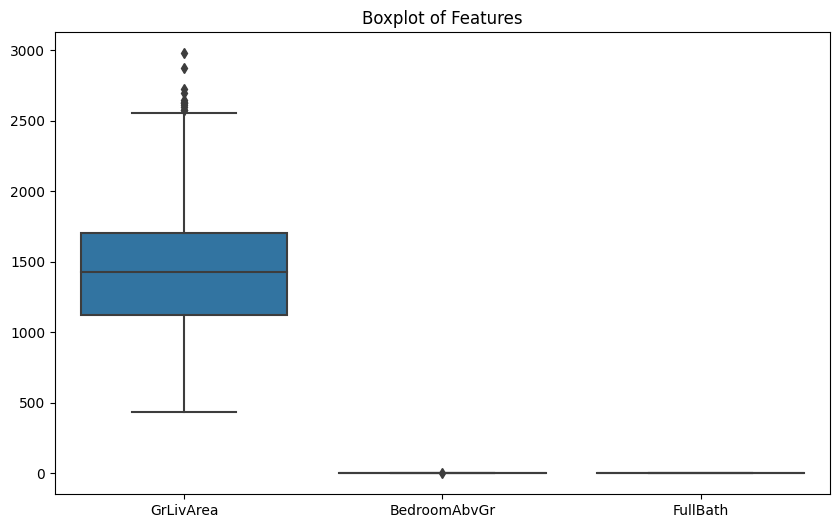

In [16]:
# Visualize outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned[['GrLivArea', 'BedroomAbvGr', 'FullBath']])
plt.title("Boxplot of Features")
plt.show()